# First Deep Learning Model

### explanation
imports necessary libraries

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_circles

### Explanation
makes random sample plot with 1000 samples and a noise amount of 0.1. the make_circle makes a circle within a circle. 

In [3]:
X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

In [ ]:
X

In [ ]:
X.shape

### explanation
This code generates a scatter plot that visualizes two different classes of data points (0 and 1) with different markers (blue circles and red crosses) and includes a legend and title for clarification. Draws both y and x within the same data plot, to visualise a circle within a circle. 

Text(0.5, 1.0, 'Blue circles and Red crosses')

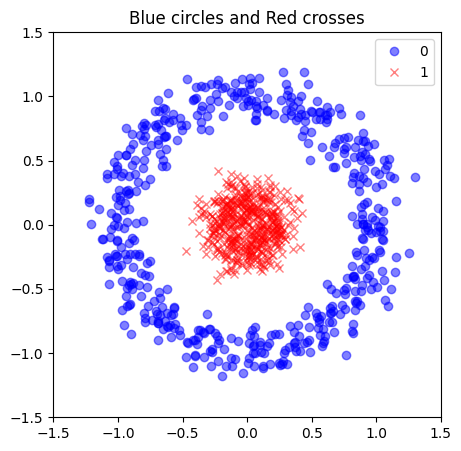

In [4]:
plt.figure(figsize=(5, 5))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### explanation
Makes a Sequential model. this makes a linear model that allows you to build it layer by layer. 
has exaclty one input tensor and one output tensor.

In [6]:
model = Sequential()

### explanation
adds a layer with 4 neurons witn an input of 1 with 2 features, for example a one dimensional array or vector. like the data points that are made above. \
This is a type of layer where each neuron receives input from all the neurons of the previous layer.\
tanh makes sure that the value transforms to a value between -1 and +1

In [7]:
model.add(Dense(4, input_shape=(2,), activation='tanh'))

c:\Users\lucvd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### explination
adds a new layer to the model with 1 neuron that has a activation funciton of sigmoid. Sigmoid makes sure that the ouput value will transform to a value between 0 and 1.

In [8]:
model.add(Dense(1, activation='sigmoid'))

### explanation
SDG is being used to makes sure that the weights of the neurons are being changed based on the output of each neuron. \
Learning rate will decide the step-over amount to wich the algorithm will correct itself. a higher learning rate means that the weights will be changed in bigger steps to insure a fast compile time. \
 A lower learning rate means the data will be more accurate but will take longer to compile. \
binary_crossentropy makes sure the output values will be between 0 and 1. \
Appying the metric of accuracy basicaly means that during traning and testing the values need to be accurate.  


In [9]:
model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

### explaniation
fit will train the model with the given data set x and y. \
epochs makes sure that the iterations of the model will be 20 times. 


In [10]:
model.fit(X, y, epochs=20)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.6296 - loss: 0.6939
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.7750 - loss: 0.6194
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.8238 - loss: 0.5303
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - accuracy: 0.8733 - loss: 0.4232
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.9336 - loss: 0.3111
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.9880 - loss: 0.2274
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.9983 - loss: 0.1605
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 1.0000 - loss: 0.1287
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 1.0000 - loss: 0.0959
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 1.0000 - loss: 0.0807
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 1.0000 - loss: 0.0686
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step

### explanation
Makes contour lines to visualize the diffrence between the crosses and circles.
These contours are being made with the data obtained from the trained neural network. 

In [12]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step


### Explanation
Draws the plot with the x and y values, whilst showing the result from the neural network with contour lines. 

Text(0.5, 1.0, 'Blue circles and Red crosses')

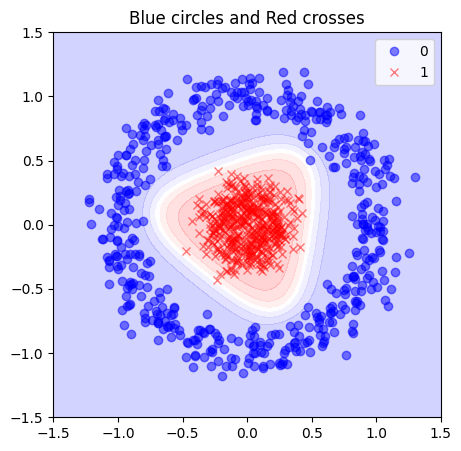

In [13]:
plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")